In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import plotly.graph_objects as go
import scipy.stats as stats
import plotly.express as px

matplotlib.rc('axes', axisbelow=True)

In [2]:
__author__ = ['Aleksandar Anžel', 'Zewen Yang']
__copyright__ = ''
__credits__ = ['Aleksandar Anžel', 'Zewen Yang', 'Georges Hattab']
__license__ = 'GNU General Public License v3.0'
__version__ = '1.0.0'
__maintainer__ = 'Aleksandar Anžel'
__email__ = 'AnzelA@rki.de'
__status__ = 'Stable'

---
### Sections 1 and 2 are authored by Aleksandar Anžel
### Sections 3 is authored by Zewen Yang
---

# 1. User Study Data Set Creation

In [3]:
path_wine_root = os.path.join('..', '..', 'data', 'Case_Study_Wine')
path_wine_original = os.path.join(path_wine_root, 'winequality-red.csv')
path_wine_result = os.path.join(path_wine_root, 'wine-sampled.csv')
df_wine_original = pd.read_csv(path_wine_original, sep=';')
df_wine_original

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
df_wine_original.dropna(inplace=True)
df_wine_original

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
df_wine_sampled = df_wine_original.groupby('quality').apply(
    lambda x: x.sample(frac=0.0125)).droplevel(0)
df_wine_sampled

/var/folders/lt/rbb0s8nn4wzbjftxx8s6bqx40000gp/T/ipykernel_15035/1204682677.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_wine_sampled = df_wine_original.groupby('quality').apply(


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
876             7.1             0.470         0.00             2.2      0.067   
40              7.3             0.450         0.36             5.9      0.074   
1582            6.1             0.715         0.10             2.6      0.053   
222             6.8             0.610         0.04             1.5      0.057   
1396            8.7             0.675         0.10             1.6      0.090   
631            10.4             0.280         0.54             2.7      0.105   
1397            7.3             0.590         0.26             2.0      0.080   
1479            8.2             0.280         0.60             3.0      0.104   
1119            5.6             0.660         0.00             2.5      0.066   
613             8.2             0.390         0.38             1.5      0.058   
418            11.9             0.380         0.51             2.0      0.121   
768             7.1             0.590         0.02             2.3      0.082   
1199            7.9             0.580         0.23             2.3      0.076   
776             6.9             0.765         0.18             2.4      0.243   
660             7.2             0.520         0.07             1.4      0.074   
1197            7.7             0.570         0.21             1.5      0.069   
1216            7.9             0.570         0.31             2.0      0.079   
1524            6.0             0.420         0.19             2.0      0.075   
1036            7.6             0.310         0.34             2.5      0.082   
645             7.8             0.640         0.10             6.0      0.115   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
876                   7.0                  14.0  0.99517  3.40       0.58   
40                   12.0                  87.0  0.99780  3.33       0.83   
1582                 13.0                  27.0  0.99362  3.57       0.50   
222                   5.0                  10.0  0.99525  3.42       0.60   
1396                  4.0                  11.0  0.99745  3.31       0.65   
631                   5.0                  19.0  0.99880  3.25       0.63   
1397                 17.0                 104.0  0.99584  3.28       0.52   
1479                 10.0                  22.0  0.99828  3.39       0.68   
1119                  7.0                  15.0  0.99256  3.52       0.58   
613                  10.0                  29.0  0.99620  3.26       0.74   
418                   7.0                  20.0  0.99960  3.24       0.76   
768                  24.0                  94.0  0.99744  3.55       0.53   
1199                 23.0                  94.0  0.99686  3.21       0.58   
776                   5.5                  48.0  0.99612  3.40       0.60   
660                   5.0                  20.0  0.99730  3.32       0.81   
1197                  4.0                   9.0  0.99458  3.16       0.54   
1216                 10.0                  79.0  0.99677  3.29       0.69   
1524                 22.0                  47.0  0.99522  3.39       0.78   
1036                 26.0                  35.0  0.99356  3.22       0.59   
645                   5.0                  11.0  0.99840  3.37       0.69   

      alcohol  quality  
876     10.90        4  
40      10.50        5  
1582    11.90        5  
222      9.50        5  
1396     9.55        5  
631      9.50        5  
1397     9.90        5  
1479    10.60        5  
1119    12.90        5  
613      9.80        5  
418     10.40        6  
768      9.70        6  
1199     9.50        6  
776     10.30        6  
660      9.60        6  
1197     9.80        6  
1216     9.50        6  
1524    10.00        6  
1036    12.50        7  
645     10.10        7

In [6]:
df_wine_sampled = df_wine_sampled.drop('quality', axis=1)
df_wine_sampled['Wine'] = ['Wine_' + str(i)
                           for i in range(df_wine_sampled.shape[0])]
df_wine_sampled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
876             7.1             0.470         0.00             2.2      0.067   
40              7.3             0.450         0.36             5.9      0.074   
1582            6.1             0.715         0.10             2.6      0.053   
222             6.8             0.610         0.04             1.5      0.057   
1396            8.7             0.675         0.10             1.6      0.090   
631            10.4             0.280         0.54             2.7      0.105   
1397            7.3             0.590         0.26             2.0      0.080   
1479            8.2             0.280         0.60             3.0      0.104   
1119            5.6             0.660         0.00             2.5      0.066   
613             8.2             0.390         0.38             1.5      0.058   
418            11.9             0.380         0.51             2.0      0.121   
768             7.1             0.590         0.02             2.3      0.082   
1199            7.9             0.580         0.23             2.3      0.076   
776             6.9             0.765         0.18             2.4      0.243   
660             7.2             0.520         0.07             1.4      0.074   
1197            7.7             0.570         0.21             1.5      0.069   
1216            7.9             0.570         0.31             2.0      0.079   
1524            6.0             0.420         0.19             2.0      0.075   
1036            7.6             0.310         0.34             2.5      0.082   
645             7.8             0.640         0.10             6.0      0.115   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
876                   7.0                  14.0  0.99517  3.40       0.58   
40                   12.0                  87.0  0.99780  3.33       0.83   
1582                 13.0                  27.0  0.99362  3.57       0.50   
222                   5.0                  10.0  0.99525  3.42       0.60   
1396                  4.0                  11.0  0.99745  3.31       0.65   
631                   5.0                  19.0  0.99880  3.25       0.63   
1397                 17.0                 104.0  0.99584  3.28       0.52   
1479                 10.0                  22.0  0.99828  3.39       0.68   
1119                  7.0                  15.0  0.99256  3.52       0.58   
613                  10.0                  29.0  0.99620  3.26       0.74   
418                   7.0                  20.0  0.99960  3.24       0.76   
768                  24.0                  94.0  0.99744  3.55       0.53   
1199                 23.0                  94.0  0.99686  3.21       0.58   
776                   5.5                  48.0  0.99612  3.40       0.60   
660                   5.0                  20.0  0.99730  3.32       0.81   
1197                  4.0                   9.0  0.99458  3.16       0.54   
1216                 10.0                  79.0  0.99677  3.29       0.69   
1524                 22.0                  47.0  0.99522  3.39       0.78   
1036                 26.0                  35.0  0.99356  3.22       0.59   
645                   5.0                  11.0  0.99840  3.37       0.69   

      alcohol     Wine  
876     10.90   Wine_0  
40      10.50   Wine_1  
1582    11.90   Wine_2  
222      9.50   Wine_3  
1396     9.55   Wine_4  
631      9.50   Wine_5  
1397     9.90   Wine_6  
1479    10.60   Wine_7  
1119    12.90   Wine_8  
613      9.80   Wine_9  
418     10.40  Wine_10  
768      9.70  Wine_11  
1199     9.50  Wine_12  
776     10.30  Wine_13  
660      9.60  Wine_14  
1197     9.80  Wine_15  
1216     9.50  Wine_16  
1524    10.00  Wine_17  
1036    12.50  Wine_18  
645     10.10  Wine_19

In [7]:
df_wine_sampled_pivoted = df_wine_sampled.pivot_table(columns='Wine')
df_wine_sampled_pivoted

Wine                    Wine_0   Wine_1  Wine_10   Wine_11   Wine_12  \
alcohol               10.90000  10.5000  10.4000   9.70000   9.50000   
chlorides              0.06700   0.0740   0.1210   0.08200   0.07600   
citric acid            0.00000   0.3600   0.5100   0.02000   0.23000   
density                0.99517   0.9978   0.9996   0.99744   0.99686   
fixed acidity          7.10000   7.3000  11.9000   7.10000   7.90000   
free sulfur dioxide    7.00000  12.0000   7.0000  24.00000  23.00000   
pH                     3.40000   3.3300   3.2400   3.55000   3.21000   
residual sugar         2.20000   5.9000   2.0000   2.30000   2.30000   
sulphates              0.58000   0.8300   0.7600   0.53000   0.58000   
total sulfur dioxide  14.00000  87.0000  20.0000  94.00000  94.00000   
volatile acidity       0.47000   0.4500   0.3800   0.59000   0.58000   

Wine                   Wine_13  Wine_14  Wine_15   Wine_16   Wine_17  \
alcohol               10.30000   9.6000  9.80000   9.50000  10.00000   
chlorides              0.24300   0.0740  0.06900   0.07900   0.07500   
citric acid            0.18000   0.0700  0.21000   0.31000   0.19000   
density                0.99612   0.9973  0.99458   0.99677   0.99522   
fixed acidity          6.90000   7.2000  7.70000   7.90000   6.00000   
free sulfur dioxide    5.50000   5.0000  4.00000  10.00000  22.00000   
pH                     3.40000   3.3200  3.16000   3.29000   3.39000   
residual sugar         2.40000   1.4000  1.50000   2.00000   2.00000   
sulphates              0.60000   0.8100  0.54000   0.69000   0.78000   
total sulfur dioxide  48.00000  20.0000  9.00000  79.00000  47.00000   
volatile acidity       0.76500   0.5200  0.57000   0.57000   0.42000   

Wine                   Wine_18  Wine_19    Wine_2    Wine_3    Wine_4  \
alcohol               12.50000  10.1000  11.90000   9.50000   9.55000   
chlorides              0.08200   0.1150   0.05300   0.05700   0.09000   
citric acid            0.34000   0.1000   0.10000   0.04000   0.10000   
density                0.99356   0.9984   0.99362   0.99525   0.99745   
fixed acidity          7.60000   7.8000   6.10000   6.80000   8.70000   
free sulfur dioxide   26.00000   5.0000  13.00000   5.00000   4.00000   
pH                     3.22000   3.3700   3.57000   3.42000   3.31000   
residual sugar         2.50000   6.0000   2.60000   1.50000   1.60000   
sulphates              0.59000   0.6900   0.50000   0.60000   0.65000   
total sulfur dioxide  35.00000  11.0000  27.00000  10.00000  11.00000   
volatile acidity       0.31000   0.6400   0.71500   0.61000   0.67500   

Wine                   Wine_5     Wine_6    Wine_7    Wine_8   Wine_9  
alcohol                9.5000    9.90000  10.60000  12.90000   9.8000  
chlorides              0.1050    0.08000   0.10400   0.06600   0.0580  
citric acid            0.5400    0.26000   0.60000   0.00000   0.3800  
density                0.9988    0.99584   0.99828   0.99256   0.9962  
fixed acidity         10.4000    7.30000   8.20000   5.60000   8.2000  
free sulfur dioxide    5.0000   17.00000  10.00000   7.00000  10.0000  
pH                     3.2500    3.28000   3.39000   3.52000   3.2600  
residual sugar         2.7000    2.00000   3.00000   2.50000   1.5000  
sulphates              0.6300    0.52000   0.68000   0.58000   0.7400  
total sulfur dioxide  19.0000  104.00000  22.00000  15.00000  29.0000  
volatile acidity       0.2800    0.59000   0.28000   0.66000   0.3900

In [8]:
series_median = df_wine_sampled[df_wine_sampled.drop('Wine', axis=1).columns.to_list()].median()
series_median

fixed acidity            7.450000
volatile acidity         0.570000
citric acid              0.200000
residual sugar           2.250000
chlorides                0.077500
free sulfur dioxide      8.500000
total sulfur dioxide    24.500000
density                  0.996485
pH                       3.325000
sulphates                0.615000
alcohol                  9.950000
dtype: float64

In [9]:
df_wine_sampled_pivoted['Median'] = series_median
df_wine_sampled_pivoted

Wine                    Wine_0   Wine_1  Wine_10   Wine_11   Wine_12  \
alcohol               10.90000  10.5000  10.4000   9.70000   9.50000   
chlorides              0.06700   0.0740   0.1210   0.08200   0.07600   
citric acid            0.00000   0.3600   0.5100   0.02000   0.23000   
density                0.99517   0.9978   0.9996   0.99744   0.99686   
fixed acidity          7.10000   7.3000  11.9000   7.10000   7.90000   
free sulfur dioxide    7.00000  12.0000   7.0000  24.00000  23.00000   
pH                     3.40000   3.3300   3.2400   3.55000   3.21000   
residual sugar         2.20000   5.9000   2.0000   2.30000   2.30000   
sulphates              0.58000   0.8300   0.7600   0.53000   0.58000   
total sulfur dioxide  14.00000  87.0000  20.0000  94.00000  94.00000   
volatile acidity       0.47000   0.4500   0.3800   0.59000   0.58000   

Wine                   Wine_13  Wine_14  Wine_15   Wine_16   Wine_17  ...  \
alcohol               10.30000   9.6000  9.80000   9.50000  10.00000  ...   
chlorides              0.24300   0.0740  0.06900   0.07900   0.07500  ...   
citric acid            0.18000   0.0700  0.21000   0.31000   0.19000  ...   
density                0.99612   0.9973  0.99458   0.99677   0.99522  ...   
fixed acidity          6.90000   7.2000  7.70000   7.90000   6.00000  ...   
free sulfur dioxide    5.50000   5.0000  4.00000  10.00000  22.00000  ...   
pH                     3.40000   3.3200  3.16000   3.29000   3.39000  ...   
residual sugar         2.40000   1.4000  1.50000   2.00000   2.00000  ...   
sulphates              0.60000   0.8100  0.54000   0.69000   0.78000  ...   
total sulfur dioxide  48.00000  20.0000  9.00000  79.00000  47.00000  ...   
volatile acidity       0.76500   0.5200  0.57000   0.57000   0.42000  ...   

Wine                  Wine_19    Wine_2    Wine_3    Wine_4   Wine_5  \
alcohol               10.1000  11.90000   9.50000   9.55000   9.5000   
chlorides              0.1150   0.05300   0.05700   0.09000   0.1050   
citric acid            0.1000   0.10000   0.04000   0.10000   0.5400   
density                0.9984   0.99362   0.99525   0.99745   0.9988   
fixed acidity          7.8000   6.10000   6.80000   8.70000  10.4000   
free sulfur dioxide    5.0000  13.00000   5.00000   4.00000   5.0000   
pH                     3.3700   3.57000   3.42000   3.31000   3.2500   
residual sugar         6.0000   2.60000   1.50000   1.60000   2.7000   
sulphates              0.6900   0.50000   0.60000   0.65000   0.6300   
total sulfur dioxide  11.0000  27.00000  10.00000  11.00000  19.0000   
volatile acidity       0.6400   0.71500   0.61000   0.67500   0.2800   

Wine                     Wine_6    Wine_7    Wine_8   Wine_9     Median  
alcohol                 9.90000  10.60000  12.90000   9.8000   9.950000  
chlorides               0.08000   0.10400   0.06600   0.0580   0.077500  
citric acid             0.26000   0.60000   0.00000   0.3800   0.200000  
density                 0.99584   0.99828   0.99256   0.9962   0.996485  
fixed acidity           7.30000   8.20000   5.60000   8.2000   7.450000  
free sulfur dioxide    17.00000  10.00000   7.00000  10.0000   8.500000  
pH                      3.28000   3.39000   3.52000   3.2600   3.325000  
residual sugar          2.00000   3.00000   2.50000   1.5000   2.250000  
sulphates               0.52000   0.68000   0.58000   0.7400   0.615000  
total sulfur dioxide  104.00000  22.00000  15.00000  29.0000  24.500000  
volatile acidity        0.59000   0.28000   0.66000   0.3900   0.570000  

[11 rows x 21 columns]

In [10]:
df_wine_sampled_pivoted.to_csv(path_wine_result, index=False)

# 2. User Study Basic Data Analysis

In [11]:
path_study_data_root = os.path.join('..', 'data')
path_study_data_results = os.path.join(path_study_data_root, 'Results_Figures')
path_study_data = os.path.join(path_study_data_root,
                               'data_polar-diagrams_2024-08-09_17-48.csv')
_COLOR_PLOT = '#2f2f2f'
df_study_data = pd.read_csv(path_study_data, skiprows=[1], encoding="utf-16")
df_study_data.head()

CASE  SERIAL  REF QUESTNNR       MODE              STARTED  IN02  IN02_01  \
0   147     NaN  NaN     base  interview  2024-07-19 12:42:44     1        2   
1   148     NaN  NaN     base  interview  2024-07-19 13:18:06     1        2   
2   149     NaN  NaN     base  interview  2024-07-19 14:17:46     1        2   
3   150     NaN  NaN     base  interview  2024-07-19 15:57:51     1        2   
4   152     NaN  NaN     base  interview  2024-07-22 10:02:46     1        2   

   NA04  NA04_01  ...  TIME_SUM  MAILSENT             LASTDATA  FINISHED  \
0     1        2  ...      1217       NaN  2024-07-19 13:03:01         1   
1     1        2  ...       947       NaN  2024-07-19 13:36:36         1   
2     1        2  ...      1203       NaN  2024-07-19 14:37:49         1   
3     1        2  ...      1335       NaN  2024-07-19 16:51:38         1   
4     1        2  ...      1685       NaN  2024-07-22 10:37:51         1   

   Q_VIEWER  LASTPAGE  MAXPAGE  MISSING  MISSREL  TIME_RSI  
0         0        16       16        0        0      1.53  
1         0        16       16        3        2      1.50  
2         0        16       16        3        2      1.28  
3         0        16       16        0        0      1.00  
4         0        16       16        0        0      1.02  

[5 rows x 82 columns]

In [12]:
# Exporting a smaller table containing the important information for the paper
# First, we create replacement dictionaries that replace IDs with values
dict_replace_gender = {
    1: 'Woman', 2: 'Man', 3: 'Transgender', 4: 'Non-binary/non-conforming',
    5: 'Prefer not to respond', -9: 'Not answered'}
dict_replace_age = {
    3: '20 to 30 years old', 4: '30 to 40 years old', 5: '40 to 50 years old',
    6: '50 to 60 years old', 7: '60 to 70 years old', -9: 'Not answered'}
dict_replace_degree = {
    1: 'No schooling completed', 2: 'Nursery school to 8th grade',
    3: 'Some high school, no diploma',
    4: 'High school graduate, diploma or the equivalent (for example: GED)',
    5: 'Some college credit, no degree',
    6: 'Trade/technical/vocational training', 7: 'Associate degree',
    8: 'Bachelor’s degree', 9: 'Master’s degree', 10: 'Professional degree',
    11: 'Doctorate degree', 12: 'Habilitation', 13: 'Other degree',
    -9: 'Not answered'
}

dict_replace_years_experience = {
    1: '< 5 years of experience', 2: '5 - 10 years of experience',
    3: '10 - 15 years of experience', 4: '15 - 20 years of experience',
    5: '20 - 25 years of experience', 6: '25 - 30 years of experience',
    7: '30 - 35 years of experience', 8: '> 35 years of experience',
    -9: 'Not answered'
}

dict_replace_polar_experience = {1: 'Yes', 2: 'No', -9: 'Not answered'}

dict_replace_summary_experience = {1: 'Yes', 2: 'No', -9: 'Not answered'}

df_participants = df_study_data[['SD05', 'SD03', 'SD12', 'SD14', 'SD15',
                                 'SD16']]

df_participants['SD05'] = df_participants['SD05'].replace(dict_replace_gender)
df_participants['SD03'] = df_participants['SD03'].replace(dict_replace_age)
df_participants['SD12'] = df_participants['SD12'].replace(dict_replace_degree)
df_participants['SD14'] = df_participants['SD14'].replace(
    dict_replace_years_experience)
df_participants['SD15'] = df_participants['SD15'].replace(
    dict_replace_polar_experience)
df_participants['SD16'] = df_participants['SD16'].replace(
    dict_replace_summary_experience)
df_participants.columns = ['Gender', 'Age', 'Degree', 'Years of Experience',
                           'Polar Charts Experience',
                           'Summary Polar Diagrams Experience']
df_participants

/var/folders/lt/rbb0s8nn4wzbjftxx8s6bqx40000gp/T/ipykernel_15035/3913546834.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participants['SD05'] = df_participants['SD05'].replace(dict_replace_gender)
/var/folders/lt/rbb0s8nn4wzbjftxx8s6bqx40000gp/T/ipykernel_15035/3913546834.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participants['SD03'] = df_participants['SD03'].replace(dict_replace_age)
/var/folders/lt/rbb0s8nn4wzbjftxx8s6bqx40000gp/T/ipykernel_15035/3913546834.py:37: SettingWithCopyW

Gender                 Age             Degree  \
0                     Man  20 to 30 years old    Master’s degree   
1   Prefer not to respond  30 to 40 years old   Doctorate degree   
2                   Woman  30 to 40 years old   Doctorate degree   
3                     Man  30 to 40 years old   Doctorate degree   
4                     Man  30 to 40 years old    Master’s degree   
5                     Man  20 to 30 years old    Master’s degree   
6                   Woman  40 to 50 years old   Doctorate degree   
7                   Woman  30 to 40 years old    Master’s degree   
8                     Man  30 to 40 years old    Master’s degree   
9                   Woman  30 to 40 years old    Master’s degree   
10                    Man  30 to 40 years old    Master’s degree   
11                    Man  30 to 40 years old    Master’s degree   
12                  Woman  20 to 30 years old    Master’s degree   
13                  Woman  30 to 40 years old   Doctorate degree   
14                    Man  30 to 40 years old    Master’s degree   
15                    Man  20 to 30 years old    Master’s degree   
16                    Man  30 to 40 years old    Master’s degree   
17                  Woman  30 to 40 years old    Master’s degree   
18                  Woman  40 to 50 years old   Doctorate degree   
19                    Man  20 to 30 years old    Master’s degree   
20                  Woman  20 to 30 years old  Bachelor’s degree   

            Years of Experience Polar Charts Experience  \
0       < 5 years of experience                      No   
1    5 - 10 years of experience                      No   
2    5 - 10 years of experience                     Yes   
3    5 - 10 years of experience                      No   
4       < 5 years of experience                      No   
5       < 5 years of experience                      No   
6   20 - 25 years of experience                     Yes   
7   10 - 15 years of experience                      No   
8    5 - 10 years of experience                      No   
9    5 - 10 years of experience                      No   
10   5 - 10 years of experience                     Yes   
11  10 - 15 years of experience                      No   
12   5 - 10 years of experience                      No   
13   5 - 10 years of experience                     Yes   
14   5 - 10 years of experience                      No   
15      < 5 years of experience                      No   
16   5 - 10 years of experience                     Yes   
17      < 5 years of experience                      No   
18  15 - 20 years of experience                     Yes   
19      < 5 years of experience                      No   
20      < 5 years of experience                      No   

   Summary Polar Diagrams Experience  
0                                 No  
1                                 No  
2                                 No  
3                                 No  
4                                 No  
5                                 No  
6                                 No  
7                                Yes  
8                                 No  
9                                 No  
10                                No  
11                                No  
12                                No  
13                                No  
14                                No  
15                                No  
16                                No  
17                                No  
18                                No  
19                                No  
20                                No

In [13]:
print(df_participants.to_latex())

\begin{tabular}{lllllll}
\toprule
 & Gender & Age & Degree & Years of Experience & Polar Charts Experience & Summary Polar Diagrams Experience \\
\midrule
0 & Man & 20 to 30 years old & Master’s degree & < 5 years of experience & No & No \\
1 & Prefer not to respond & 30 to 40 years old & Doctorate degree & 5 - 10 years of experience & No & No \\
2 & Woman & 30 to 40 years old & Doctorate degree & 5 - 10 years of experience & Yes & No \\
3 & Man & 30 to 40 years old & Doctorate degree & 5 - 10 years of experience & No & No \\
4 & Man & 30 to 40 years old & Master’s degree & < 5 years of experience & No & No \\
5 & Man & 20 to 30 years old & Master’s degree & < 5 years of experience & No & No \\
6 & Woman & 40 to 50 years old & Doctorate degree & 20 - 25 years of experience & Yes & No \\
7 & Woman & 30 to 40 years old & Master’s degree & 10 - 15 years of experience & No & Yes \\
8 & Man & 30 to 40 years old & Master’s degree & 5 - 10 years of experience & No & No \\
9 & Woman & 30 to 40

## 2.1. Gender

<Axes: xlabel='SD05'>

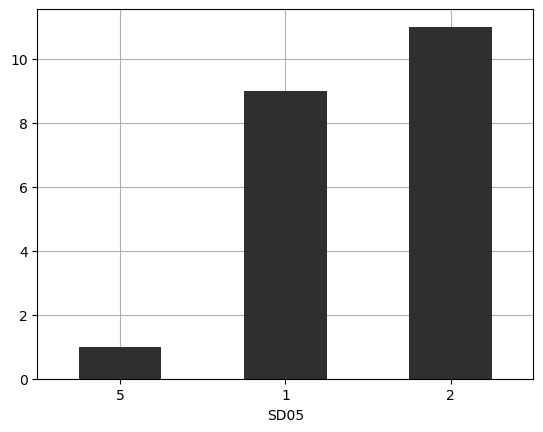

In [14]:
# SD05	Geschlecht (zum kombinieren)	1	Woman
# SD05	Geschlecht (zum kombinieren)	2	Man
# SD05	Geschlecht (zum kombinieren)	3	Transgender
# SD05	Geschlecht (zum kombinieren)	4	Non-binary/non-conforming
# SD05	Geschlecht (zum kombinieren)	5	Prefer not to respond
# SD05	Geschlecht (zum kombinieren)	-9	Not answered

df_study_data['SD05'].value_counts().sort_values().plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

## 2.2. Age

<Axes: xlabel='SD03'>

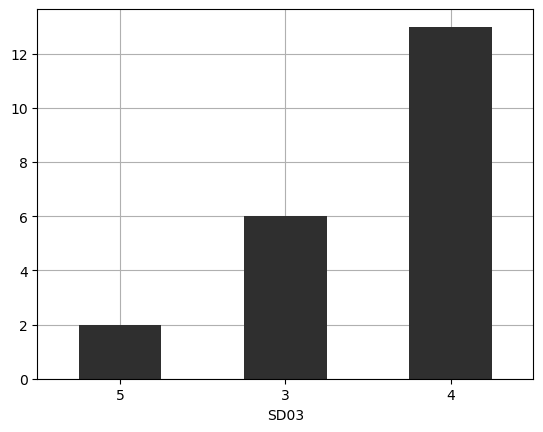

In [15]:
# Alter (Kategorien, 5 Jahre)	3	20 to 30 years old
# Alter (Kategorien, 5 Jahre)	4	30 to 40 years old
# Alter (Kategorien, 5 Jahre)	5	40 to 50 years old
# Alter (Kategorien, 5 Jahre)	6	50 to 60 years old
# Alter (Kategorien, 5 Jahre)	7	60 to 70 years old
# Alter (Kategorien, 5 Jahre)	-9	Not answered

df_study_data['SD03'].value_counts().sort_values().plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [16]:
df_study_data['SD03'].describe()

count    21.000000
mean      3.809524
std       0.601585
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: SD03, dtype: float64

## 2.3. Degree

<Axes: xlabel='SD12'>

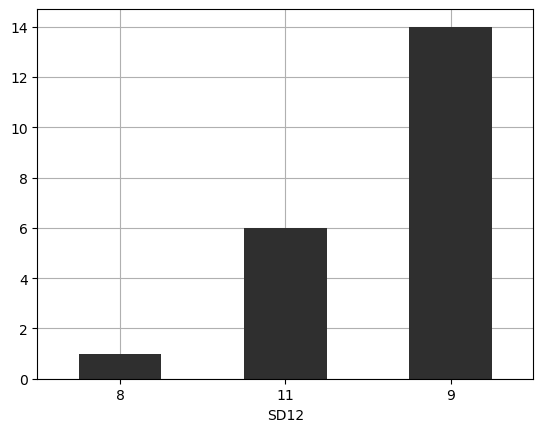

In [17]:
# Beruflicher Bildungsabschluss	1	No schooling completed
# Beruflicher Bildungsabschluss	2	Nursery school to 8th grade
# Beruflicher Bildungsabschluss	3	Some high school, no diploma
# Beruflicher Bildungsabschluss	4	High school graduate, diploma or the equivalent (for example: GED)
# Beruflicher Bildungsabschluss	5	Some college credit, no degree
# Beruflicher Bildungsabschluss	6	Trade/technical/vocational training
# Beruflicher Bildungsabschluss	7	Associate degree
# Beruflicher Bildungsabschluss	8	Bachelor’s degree
# Beruflicher Bildungsabschluss	9	Master’s degree
# Beruflicher Bildungsabschluss	10	Professional degree
# Beruflicher Bildungsabschluss	11	Doctorate degree
# Beruflicher Bildungsabschluss	12	Habilitation
# Beruflicher Bildungsabschluss	13	Other degree
# Beruflicher Bildungsabschluss	-9	Not answered

df_study_data['SD12'].value_counts().sort_values().plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

## 2.4. Years of experience

<Axes: xlabel='SD14'>

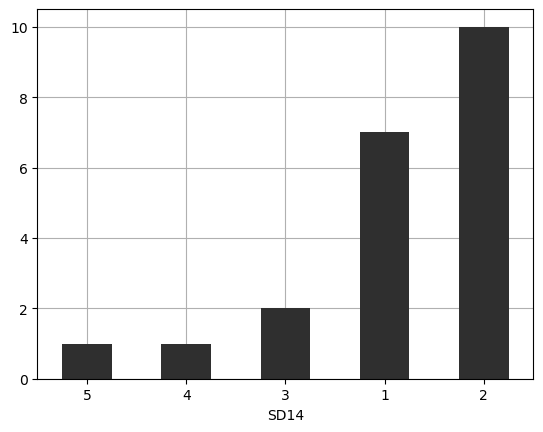

In [18]:
# Years of experience	1	< 5 years of experience
# Years of experience	2	5 - 10 years of experience
# Years of experience	3	10 - 15 years of experience
# Years of experience	4	15 - 20 years of experience
# Years of experience	5	20 - 25 years of experience
# Years of experience	6	25 - 30 years of experience
# Years of experience	7	30 - 35 years of experience
# Years of experience	8	> 35 years of experience
# Years of experience	-9	Not answered

df_study_data['SD14'].value_counts().sort_values().plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [19]:
df_study_data['SD14'].describe()

count    21.000000
mean      2.000000
std       1.048809
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: SD14, dtype: float64

## 2.5. Experience with polar charts

<Axes: xlabel='SD15'>

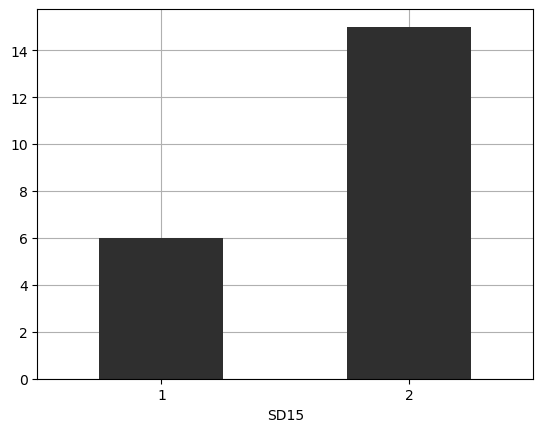

In [20]:
# Polar charts	1	Yes
# Polar charts	2	No
# Polar charts	-9	Not answered

df_study_data['SD15'].value_counts().sort_values().plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

## 2.6. Experience with summary polar diagrams

<Axes: xlabel='SD16'>

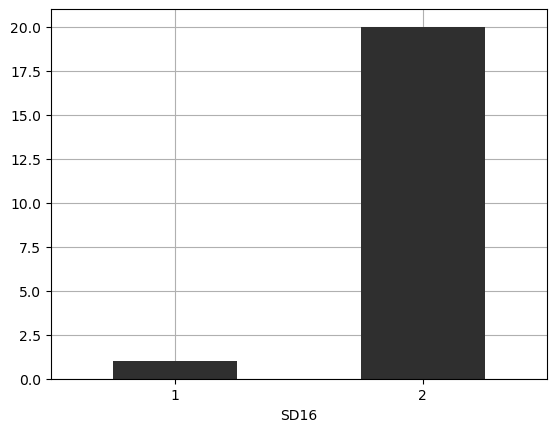

In [21]:
# Summary polar diagrams	1	Yes
# Summary polar diagrams	2	No
# Summary polar diagrams	-9	Not answered

df_study_data['SD16'].value_counts().sort_values().plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

## 2.7. Time to complete
### 2.7.1. Everything

<Axes: >

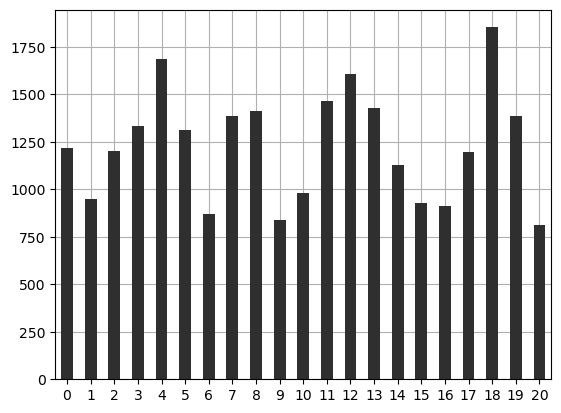

In [22]:
df_study_data['TIME_SUM'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [23]:
df_study_data['TIME_SUM'].describe()

count      21.000000
mean     1234.428571
std       294.243704
min       815.000000
25%       947.000000
50%      1217.000000
75%      1414.000000
max      1854.000000
Name: TIME_SUM, dtype: float64

In [24]:
pd.to_datetime(df_study_data['TIME_SUM'], unit='s').describe()

count                               21
mean     1970-01-01 00:20:34.428571428
min                1970-01-01 00:13:35
25%                1970-01-01 00:15:47
50%                1970-01-01 00:20:17
75%                1970-01-01 00:23:34
max                1970-01-01 00:30:54
Name: TIME_SUM, dtype: object

In [25]:
# Task 1E - page 5
# Task 1T - page 6
# Task 2E - page 8
# Task 2T - page 9
# Task 3E - page 11
# Task 3T - page 12
# Task 4E - page 14
# Task 4T - page 15

### 2.7.2. Task 1 Training

<Axes: >

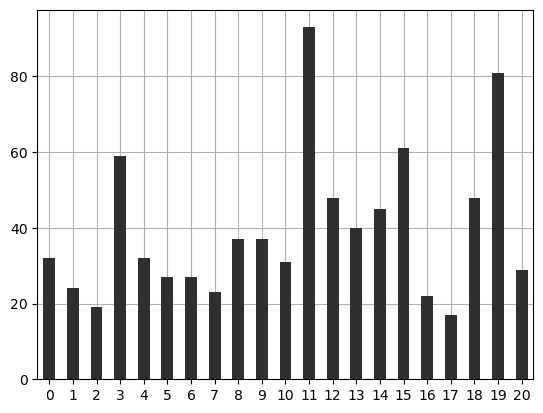

In [26]:
df_study_data['TIME005'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [27]:
pd.to_datetime(df_study_data['TIME005'], unit='s').describe()

count                               21
mean     1970-01-01 00:00:39.619047619
min                1970-01-01 00:00:17
25%                1970-01-01 00:00:27
50%                1970-01-01 00:00:32
75%                1970-01-01 00:00:48
max                1970-01-01 00:01:33
Name: TIME005, dtype: object

### 2.7.3. Task 1 Test

<Axes: >

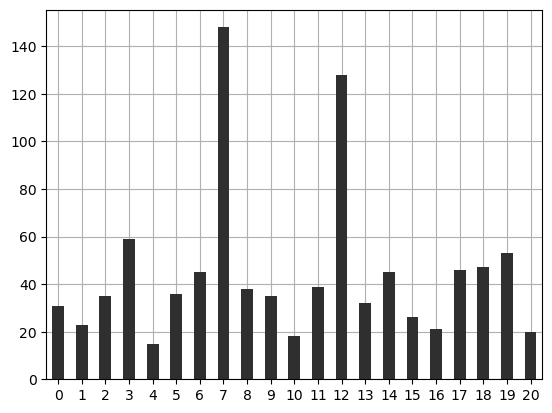

In [28]:
df_study_data['TIME006'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [29]:
pd.to_datetime(df_study_data['TIME006'], unit='s').describe()

count                               21
mean     1970-01-01 00:00:44.761904761
min                1970-01-01 00:00:15
25%                1970-01-01 00:00:26
50%                1970-01-01 00:00:36
75%                1970-01-01 00:00:46
max                1970-01-01 00:02:28
Name: TIME006, dtype: object

### 2.7.4. Task 2 Training

<Axes: >

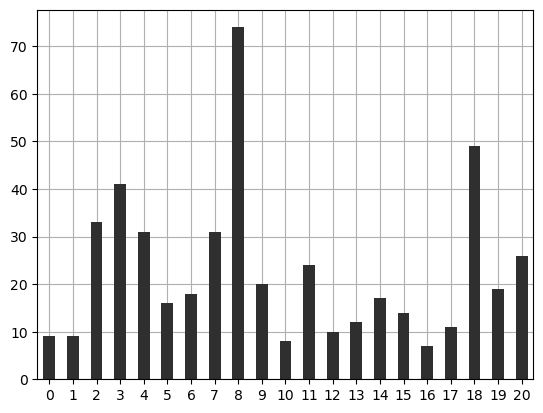

In [30]:
df_study_data['TIME008'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [31]:
pd.to_datetime(df_study_data['TIME008'], unit='s').describe()

count                               21
mean     1970-01-01 00:00:22.809523809
min                1970-01-01 00:00:07
25%                1970-01-01 00:00:11
50%                1970-01-01 00:00:18
75%                1970-01-01 00:00:31
max                1970-01-01 00:01:14
Name: TIME008, dtype: object

### 2.7.5. Task 2 Test

<Axes: >

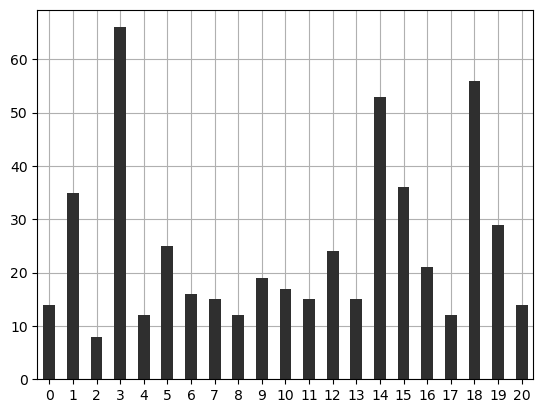

In [32]:
df_study_data['TIME009'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [33]:
pd.to_datetime(df_study_data['TIME009'], unit='s').describe()

count                               21
mean     1970-01-01 00:00:24.476190476
min                1970-01-01 00:00:08
25%                1970-01-01 00:00:14
50%                1970-01-01 00:00:17
75%                1970-01-01 00:00:29
max                1970-01-01 00:01:06
Name: TIME009, dtype: object

### 2.7.6. Task 3 Training

<Axes: >

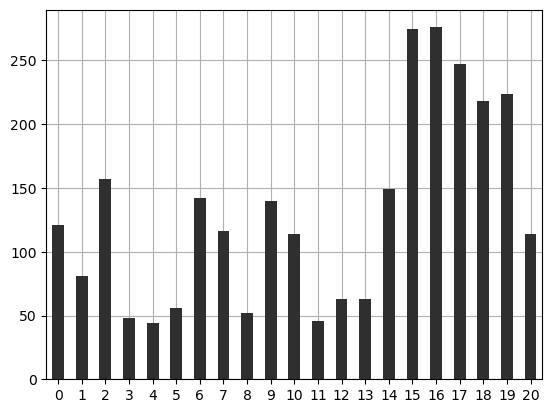

In [34]:
df_study_data['TIME011'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [35]:
pd.to_datetime(df_study_data['TIME011'], unit='s').describe()

count                               21
mean     1970-01-01 00:02:10.761904761
min                1970-01-01 00:00:44
25%                1970-01-01 00:01:03
50%                1970-01-01 00:01:56
75%                1970-01-01 00:02:37
max                1970-01-01 00:04:36
Name: TIME011, dtype: object

### 2.7.7. Task 3 Test

<Axes: >

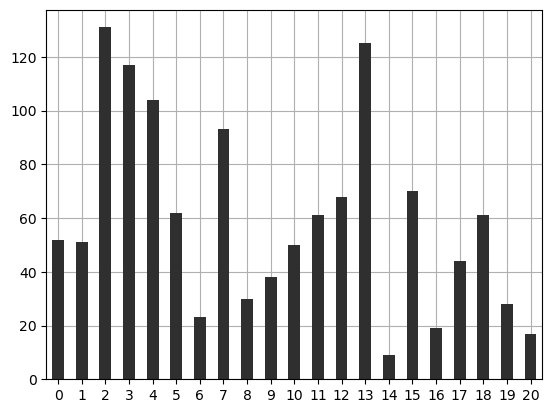

In [36]:
df_study_data['TIME012'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [37]:
pd.to_datetime(df_study_data['TIME012'], unit='s').describe()

count                               21
mean     1970-01-01 00:00:59.666666666
min                1970-01-01 00:00:09
25%                1970-01-01 00:00:30
50%                1970-01-01 00:00:52
75%                1970-01-01 00:01:10
max                1970-01-01 00:02:11
Name: TIME012, dtype: object

### 2.7.8. Task 4 Training

<Axes: >

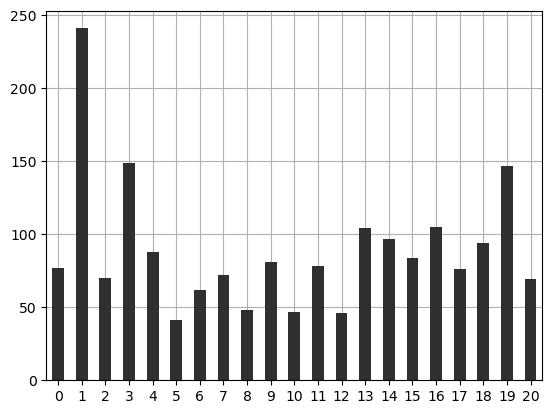

In [38]:
df_study_data['TIME014'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [39]:
pd.to_datetime(df_study_data['TIME014'], unit='s').describe()

count                               21
mean     1970-01-01 00:01:29.333333333
min                1970-01-01 00:00:41
25%                1970-01-01 00:01:09
50%                1970-01-01 00:01:18
75%                1970-01-01 00:01:37
max                1970-01-01 00:04:01
Name: TIME014, dtype: object

### 2.7.9. Task 4 Test

<Axes: >

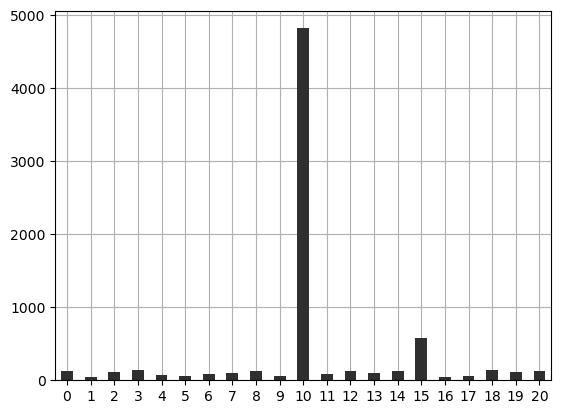

In [40]:
df_study_data['TIME015'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [41]:
pd.to_datetime(df_study_data['TIME015'], unit='s').describe()

count                               21
mean     1970-01-01 00:05:45.714285714
min                1970-01-01 00:00:44
25%                1970-01-01 00:01:18
50%                1970-01-01 00:01:50
75%                1970-01-01 00:02:08
max                1970-01-01 01:20:21
Name: TIME015, dtype: object

### 2.7.10. Cumulative

- "TS04","TASK1 E","NOMINAL","SELECTION","Which model is closest to the reference model?"
- "TS07","TASK2 E","NOMINAL","SELECTION","How many clusters are there, not counting the reference model?"
- "TS10","TASK3 E","NOMINAL","SELECTION","Select <u>Cluster 1</u> using the legend or overview. Which individual model at the center of that cluster has the middle/median variation of information (VI)?"
- "TS13","TASK4 E","NOMINAL","SELECTION","Select models <u>Wine_4</u> and <u>Wine_17</u>. Check the tooltip and Cartesian-linking plot. What is the approximate sum of their entropies?"
- "TS05","TASK1 T","NOMINAL","SELECTION","Which 3 models are the furthest from the reference model?"
- "TS08","TASK2 T","NOMINAL","SELECTION","How many models are in <u>Cluster 4</u>?"
- "TS11","TASK3 T","NOMINAL","SELECTION","What model from <u>Cluster 1</u> is furthest from <u>Cluster 5</u>?"
- "TS14","TASK4 T","NOMINAL","SELECTION","Select <u>Cluster 3</u> and <u>Cluster 5</u>. What are the ranges of variation of information (VI) within these two clusters? Provide the minimum and maximum VI values for these clusters, starting from smallest to largest."

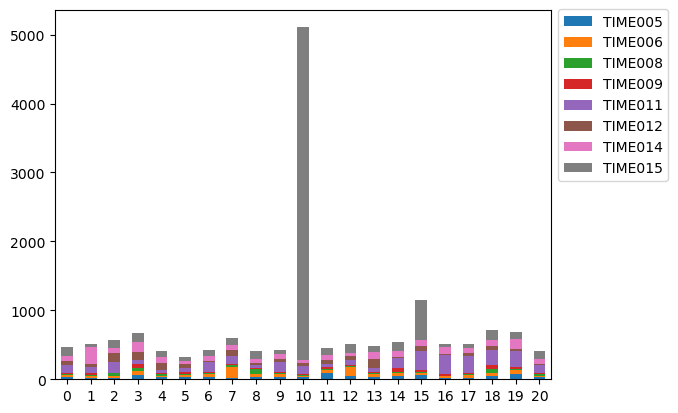

In [42]:
ax = df_study_data.plot(
    y=['TIME005', 'TIME006', 'TIME008', 'TIME009', 'TIME011', 'TIME012',
       'TIME014', 'TIME015'],
    kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

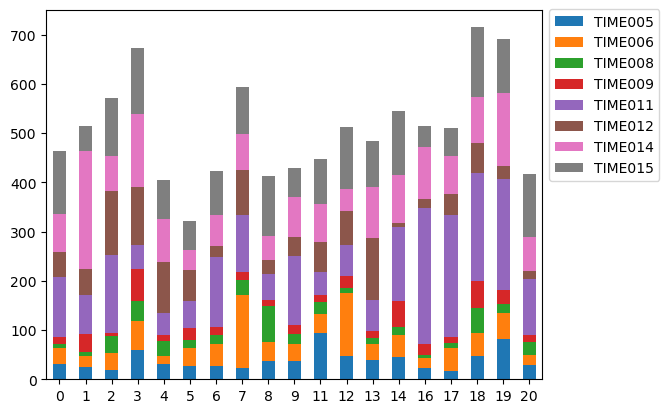

In [43]:
ax = df_study_data.drop([10, 15]).plot(  # We drop two outliers
    y=['TIME005', 'TIME006', 'TIME008', 'TIME009', 'TIME011', 'TIME012',
       'TIME014', 'TIME015'],
    kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

## 2.8. SGL Scale

<Axes: >

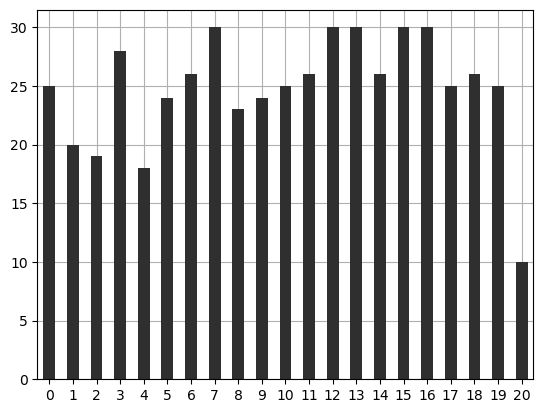

In [44]:
df_study_data['SGL_Score'] = df_study_data[[
    'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05']].sum(axis=1)

df_study_data['SGL_Score'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [45]:
df_study_data['SGL_Score'].describe()

count    21.000000
mean     24.761905
std       4.887788
min      10.000000
25%      24.000000
50%      25.000000
75%      28.000000
max      30.000000
Name: SGL_Score, dtype: float64

## 2.9. SUS Evaluation

<Axes: >

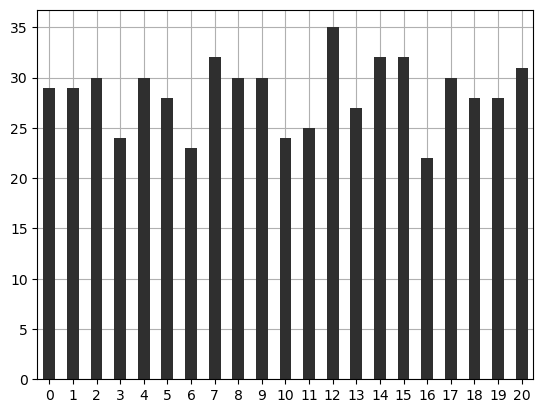

In [46]:
df_study_data['SUS_Evaluation'] = df_study_data[[
    'OU01_01', 'OU01_02', 'OU01_03', 'OU01_04', 'OU01_05', 'OU01_06',
    'OU01_07', 'OU01_08', 'OU01_09', 'OU01_10']].sum(axis=1)

df_study_data['SUS_Evaluation'].plot(
    kind='bar', rot=0, color=_COLOR_PLOT, grid=True)

In [47]:
list_questions = ['OU01_01', 'OU01_02', 'OU01_03', 'OU01_04', 'OU01_05',
                  'OU01_06', 'OU01_07', 'OU01_08', 'OU01_09', 'OU01_10']

dict_sus_questions = {
    'OU01_01': 'I think that I would like to use this system frequently.',
    'OU01_02': 'I found the system unnecessarily complex.',
    'OU01_03': 'I thought the system was easy to use.',
    'OU01_04': 'I think that I would need the support of a technical person to be able to use this system.',  # noqa
    'OU01_05': 'I found the various functions in this system were well integrated.',  # noqa
    'OU01_06': 'I thought there was too much inconsistency in this system.',
    'OU01_07': 'I would imagine that most people would learn to use this system very quickly.',  # noqa
    'OU01_08': 'I found the system very cumbersome to use.',
    'OU01_09': 'I felt very confident using the system.',
    'OU01_10': 'I needed to learn a lot of things before I could get going with this system.'  # noqa
}

df_sus_evaluation = df_study_data[['OU01_01', 'OU01_02', 'OU01_03', 'OU01_04',
                                   'OU01_05', 'OU01_06', 'OU01_07', 'OU01_08',
                                   'OU01_09', 'OU01_10']]
df_sus_evaluation_long = df_sus_evaluation.melt()
df_sus_evaluation_long['Question'] = [
    dict_sus_questions[string_id] for string_id in
    df_sus_evaluation_long['variable']]
df_sus_evaluation_long["Question_wrapped"] = df_sus_evaluation_long[
    "Question"].str.wrap(width=20, max_lines=4, placeholder = " ... ")
df_sus_evaluation_long["Question_wrapped"] = df_sus_evaluation_long[
    "Question_wrapped"].str.replace('\n', '<br>')
df_sus_evaluation_long

variable  value                                           Question  \
0    OU01_01      2  I think that I would like to use this system f...   
1    OU01_01      2  I think that I would like to use this system f...   
2    OU01_01      3  I think that I would like to use this system f...   
3    OU01_01      1  I think that I would like to use this system f...   
4    OU01_01      5  I think that I would like to use this system f...   
..       ...    ...                                                ...   
205  OU01_10      1  I needed to learn a lot of things before I cou...   
206  OU01_10      2  I needed to learn a lot of things before I cou...   
207  OU01_10      1  I needed to learn a lot of things before I cou...   
208  OU01_10      2  I needed to learn a lot of things before I cou...   
209  OU01_10      2  I needed to learn a lot of things before I cou...   

                                      Question_wrapped  
0    I think that I would<br>like to use this<br>sy...  
1    I think that I would<br>like to use this<br>sy...  
2    I think that I would<br>like to use this<br>sy...  
3    I think that I would<br>like to use this<br>sy...  
4    I think that I would<br>like to use this<br>sy...  
..                                                 ...  
205  I needed to learn a<br>lot of things before<br...  
206  I needed to learn a<br>lot of things before<br...  
207  I needed to learn a<br>lot of things before<br...  
208  I needed to learn a<br>lot of things before<br...  
209  I needed to learn a<br>lot of things before<br...  

[210 rows x 4 columns]

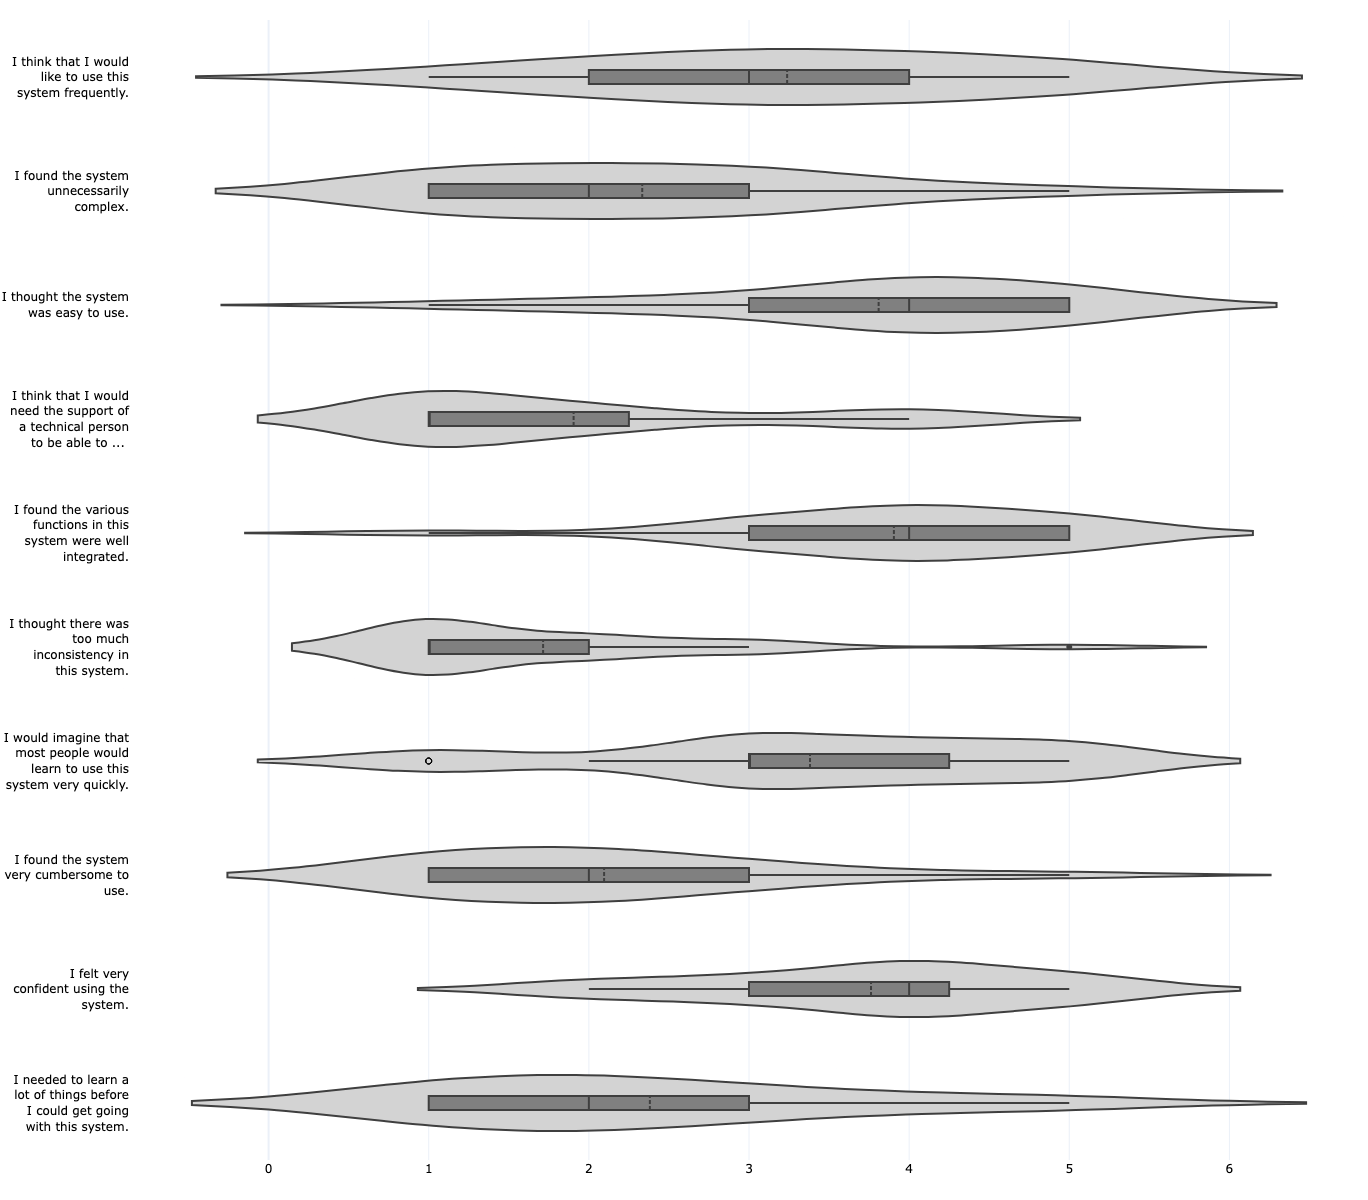

In [48]:
chart_sus = go.Figure()

for string_question in list_questions[::-1]:
    chart_sus.add_trace(go.Violin(
        y=df_sus_evaluation_long['Question_wrapped'][
            df_sus_evaluation_long['variable'] == string_question],
        x=df_sus_evaluation_long['value'][
            df_sus_evaluation_long['variable'] == string_question],
        name=dict_sus_questions[string_question],
        box_visible=True,
        meanline_visible=True,
        fillcolor = '#d3d3d3',
        line_color = '#3f3f3f',
        marker_line_outliercolor= 'black',
        box_fillcolor = 'grey'))

chart_sus.update_traces(orientation='h')
chart_sus.update_layout(height=1200, width=800, showlegend=False,
                        template='plotly_white',
                        margin=dict(l=20, r=0, t=20, b=40))
chart_sus.update_yaxes(tickfont_color='black')
chart_sus.update_xaxes(tickfont_color='black')
chart_sus.write_image(os.path.join(path_study_data_results, 'SUS.pdf'))
chart_sus.show()

In [49]:
df_experts = df_study_data[df_study_data['SUS_Evaluation'] > 28.0]

df_sus_evaluation_experts = df_experts[[
    'OU01_01', 'OU01_02', 'OU01_03', 'OU01_04',
    'OU01_05', 'OU01_06', 'OU01_07', 'OU01_08',
    'OU01_09', 'OU01_10']]
df_sus_evaluation_experts_long = df_sus_evaluation_experts.melt()
df_sus_evaluation_experts_long['Question'] = [
    dict_sus_questions[string_id] for string_id in
    df_sus_evaluation_experts_long['variable']]
df_sus_evaluation_experts_long["Question_wrapped"] = df_sus_evaluation_experts_long[  # noqa
    "Question"].str.wrap(width=20, max_lines=4, placeholder = " ... ")
df_sus_evaluation_experts_long["Question_wrapped"] = df_sus_evaluation_experts_long[
    "Question_wrapped"].str.replace('\n', '<br>')
df_sus_evaluation_experts_long

variable  value                                           Question  \
0    OU01_01      2  I think that I would like to use this system f...   
1    OU01_01      2  I think that I would like to use this system f...   
2    OU01_01      3  I think that I would like to use this system f...   
3    OU01_01      5  I think that I would like to use this system f...   
4    OU01_01      5  I think that I would like to use this system f...   
..       ...    ...                                                ...   
115  OU01_10      4  I needed to learn a lot of things before I cou...   
116  OU01_10      4  I needed to learn a lot of things before I cou...   
117  OU01_10      2  I needed to learn a lot of things before I cou...   
118  OU01_10      2  I needed to learn a lot of things before I cou...   
119  OU01_10      2  I needed to learn a lot of things before I cou...   

                                      Question_wrapped  
0    I think that I would<br>like to use this<br>sy...  
1    I think that I would<br>like to use this<br>sy...  
2    I think that I would<br>like to use this<br>sy...  
3    I think that I would<br>like to use this<br>sy...  
4    I think that I would<br>like to use this<br>sy...  
..                                                 ...  
115  I needed to learn a<br>lot of things before<br...  
116  I needed to learn a<br>lot of things before<br...  
117  I needed to learn a<br>lot of things before<br...  
118  I needed to learn a<br>lot of things before<br...  
119  I needed to learn a<br>lot of things before<br...  

[120 rows x 4 columns]

In [50]:
df_non_experts = df_study_data[df_study_data['SUS_Evaluation'] <= 28.0]

df_sus_evaluation_non_experts = df_non_experts[[
    'OU01_01', 'OU01_02', 'OU01_03', 'OU01_04',
    'OU01_05', 'OU01_06', 'OU01_07', 'OU01_08',
    'OU01_09', 'OU01_10']]
df_sus_evaluation_non_experts_long = df_sus_evaluation_non_experts.melt()
df_sus_evaluation_non_experts_long['Question'] = [
    dict_sus_questions[string_id] for string_id in
    df_sus_evaluation_non_experts_long['variable']]
df_sus_evaluation_non_experts_long["Question_wrapped"] = df_sus_evaluation_non_experts_long[  # noqa
    "Question"].str.wrap(width=20, max_lines=4, placeholder = " ... ")
df_sus_evaluation_non_experts_long["Question_wrapped"] = df_sus_evaluation_non_experts_long[  # noqa
    "Question_wrapped"].str.replace('\n', '<br>')
df_sus_evaluation_non_experts_long

variable  value                                           Question  \
0   OU01_01      1  I think that I would like to use this system f...   
1   OU01_01      5  I think that I would like to use this system f...   
2   OU01_01      2  I think that I would like to use this system f...   
3   OU01_01      3  I think that I would like to use this system f...   
4   OU01_01      3  I think that I would like to use this system f...   
..      ...    ...                                                ...   
85  OU01_10      1  I needed to learn a lot of things before I cou...   
86  OU01_10      1  I needed to learn a lot of things before I cou...   
87  OU01_10      1  I needed to learn a lot of things before I cou...   
88  OU01_10      1  I needed to learn a lot of things before I cou...   
89  OU01_10      2  I needed to learn a lot of things before I cou...   

                                     Question_wrapped  
0   I think that I would<br>like to use this<br>sy...  
1   I think that I would<br>like to use this<br>sy...  
2   I think that I would<br>like to use this<br>sy...  
3   I think that I would<br>like to use this<br>sy...  
4   I think that I would<br>like to use this<br>sy...  
..                                                ...  
85  I needed to learn a<br>lot of things before<br...  
86  I needed to learn a<br>lot of things before<br...  
87  I needed to learn a<br>lot of things before<br...  
88  I needed to learn a<br>lot of things before<br...  
89  I needed to learn a<br>lot of things before<br...  

[90 rows x 4 columns]

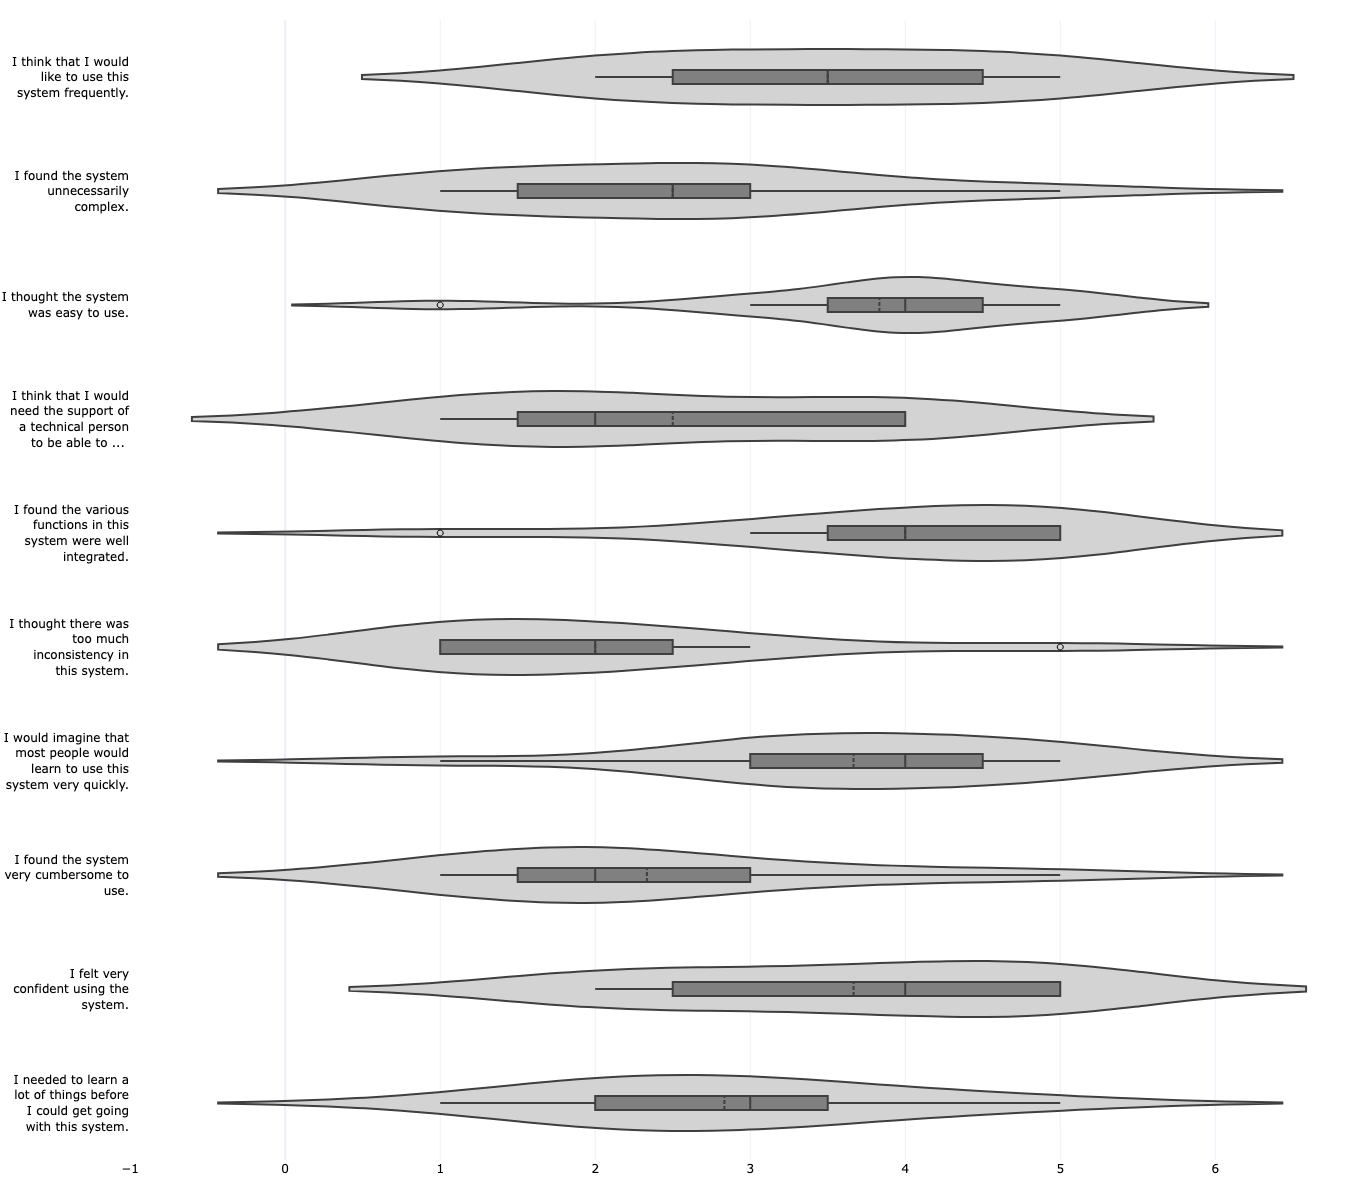

In [51]:
chart_sus_expert = go.Figure()

for string_question in list_questions[::-1]:
    chart_sus_expert.add_trace(go.Violin(
        y=df_sus_evaluation_experts_long['Question_wrapped'][
            df_sus_evaluation_experts_long['variable'] == string_question],
        x=df_sus_evaluation_experts_long['value'][
            df_sus_evaluation_experts_long['variable'] == string_question],
        name=dict_sus_questions[string_question],
        box_visible=True,
        meanline_visible=True,
        fillcolor = '#d3d3d3',
        line_color = '#3f3f3f',
        marker_line_outliercolor= 'black',
        box_fillcolor = 'grey'))

chart_sus_expert.update_traces(orientation='h')
chart_sus_expert.update_layout(height=1200, width=800, showlegend=False,
                               template='plotly_white',
                               margin=dict(l=20, r=0, t=20, b=40))
chart_sus_expert.update_yaxes(tickfont_color='black')
chart_sus_expert.update_xaxes(tickfont_color='black')
chart_sus_expert.write_image(os.path.join(path_study_data_results,
                                          'SUS_expert.pdf'))
chart_sus_expert.show()

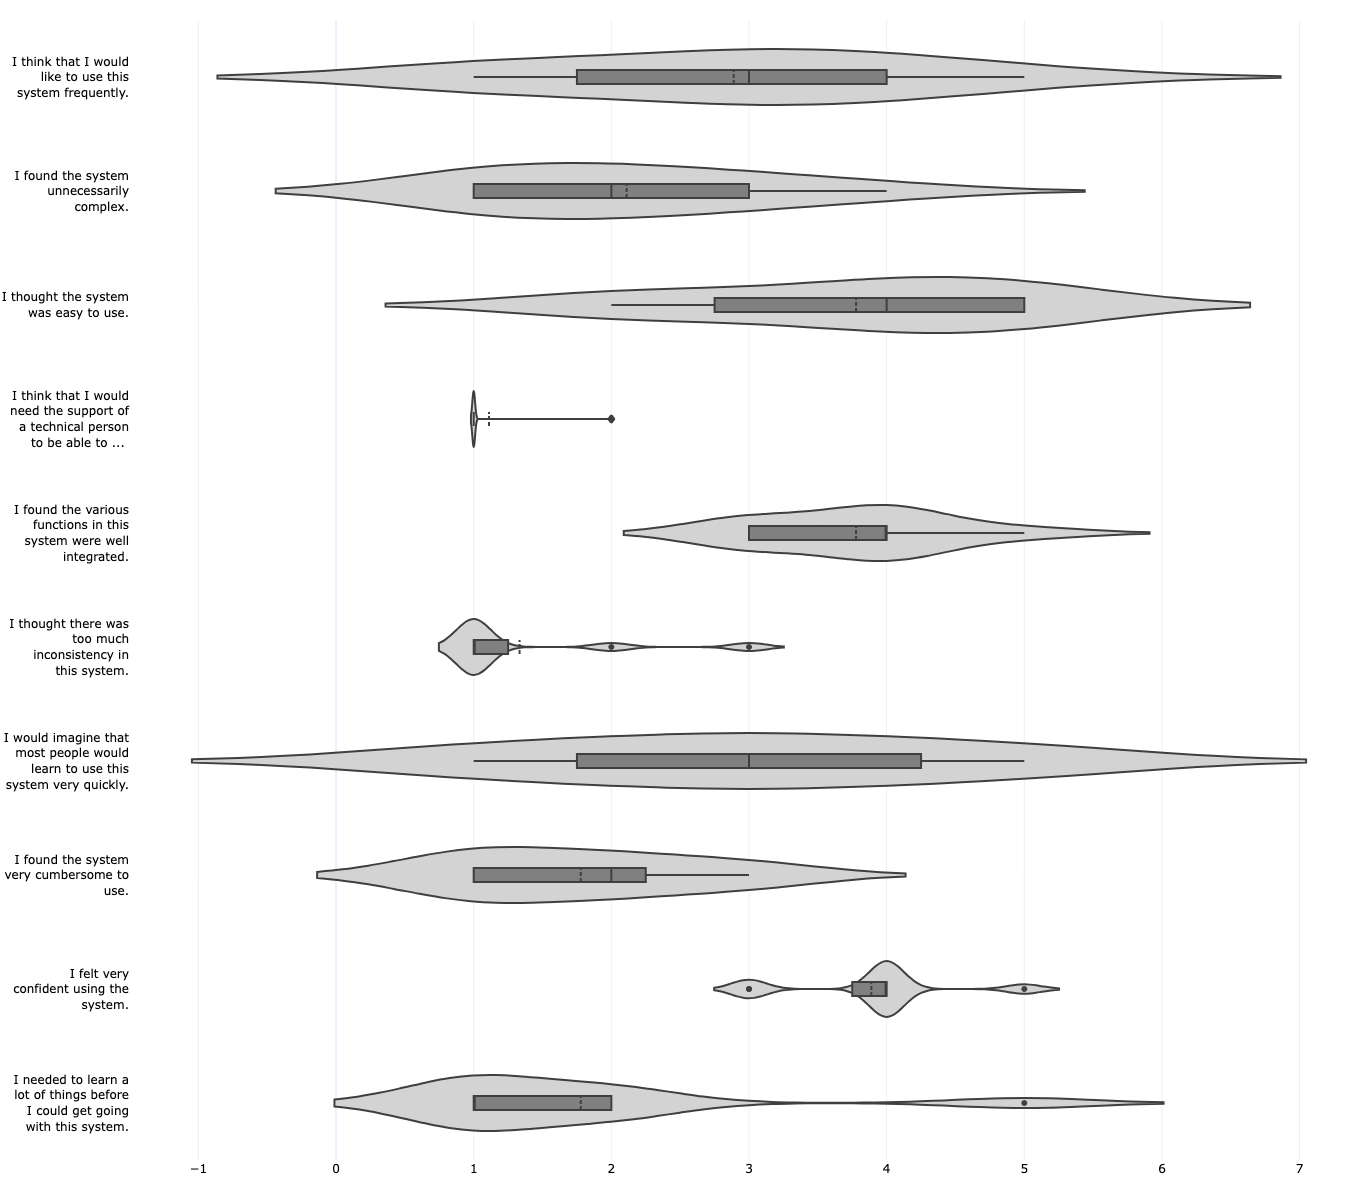

In [52]:
chart_sus_non_expert = go.Figure()

for string_question in list_questions[::-1]:
    chart_sus_non_expert.add_trace(go.Violin(
        y=df_sus_evaluation_non_experts_long['Question_wrapped'][
            df_sus_evaluation_non_experts_long['variable'] == string_question],
        x=df_sus_evaluation_non_experts_long['value'][
            df_sus_evaluation_non_experts_long['variable'] == string_question],
        name=dict_sus_questions[string_question],
        box_visible=True,
        meanline_visible=True,
        fillcolor = '#d3d3d3',
        line_color = '#3f3f3f',
        marker_line_outliercolor= 'black',
        box_fillcolor = 'grey'))

chart_sus_non_expert.update_traces(orientation='h')
chart_sus_non_expert.update_layout(height=1200, width=800, showlegend=False,
                                   template='plotly_white',
                                   margin=dict(l=20, r=0, t=20, b=40))
chart_sus_non_expert.update_yaxes(tickfont_color='black')
chart_sus_non_expert.update_xaxes(tickfont_color='black')
chart_sus_non_expert.write_image(os.path.join(path_study_data_results,
                                              'SUS_non_expert.pdf'))
chart_sus_non_expert.show()

## 2.10. Optional Feedback

In [53]:
for i, str_text in enumerate(df_study_data['OU03_01'].to_list()):
    if not isinstance(str_text, float):
        print(str(i) + ': ' + str_text + '\n')

0: I think the idea is very good and I comparing the proximity via the radial scale is easier than looking at barplots. However, I think the part with the clustering and comparing the clusters could be improved. It felt a little clumsy and it took some time to select the clusters I was interested in. 
Maybe you could add a function that let the user select the cluster with the legend? I think it's also a little confusing that points from different clusters have different colors. It would maybe be easiert to follow if all points of Cluster 1 were shown in different shades of blue. 

3: the reference model is not always shown whenever the user select subcategories

4: everything looks well-developed and quite straightforward to follow. However, the figures in the explanation page seem to appear slightly smaller in laptop, though they are still visible. 

7: I missed a button or clear instructions on resetting the page and returning to the initial state.

8: I had an issue where some of t

## 2.11. Expertise

In [54]:
# "SD13","Field of expertise: Residual option (negative) or number of selected options","METRIC","SYSTEM","What is your field of expertise? Multiple choices are allowed."
# "SD13_01","Field of expertise: Business and Management","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_02","Field of expertise: Engineering and Technology","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_03","Field of expertise: Healthcare and Medicine","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_04","Field of expertise: Education and Teaching","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_05","Field of expertise: Arts and Design","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_06","Field of expertise: Law and Legal Services","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_07","Field of expertise: Finance and Economics","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_08","Field of expertise: Information Technology","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_09","Field of expertise: Sciences (Physical, Life, and Social)","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_10","Field of expertise: Media and Communications","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_11","Field of expertise: Agriculture and Environmental Studies","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_12","Field of expertise: Public Service and Administration","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_13","Field of expertise: Hospitality and Tourism","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_14","Field of expertise: Manufacturing and Construction","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."
# "SD13_15","Field of expertise: Social Services and Counseling","DICHOTOMOUS","CHECKBOX","What is your field of expertise? Multiple choices are allowed."

df_expertise_data = df_study_data[[
    'SD13', 'SD13_01', 'SD13_02', 'SD13_03', 'SD13_04', 'SD13_05', 'SD13_06',
    'SD13_07', 'SD13_08', 'SD13_09', 'SD13_10', 'SD13_11', 'SD13_12',
    'SD13_13', 'SD13_14', 'SD13_15']].copy()
df_expertise_data

SD13  SD13_01  SD13_02  SD13_03  SD13_04  SD13_05  SD13_06  SD13_07  \
0      2        1        1        1        1        1        1        1   
1      2        1        1        1        1        1        1        1   
2      2        1        1        2        1        1        1        1   
3      1        1        2        1        1        1        1        1   
4      2        1        1        2        1        1        1        1   
5      1        1        1        1        1        1        1        1   
6      6        2        2        2        2        1        1        1   
7      1        1        2        1        1        1        1        1   
8      2        1        1        1        1        1        1        1   
9      1        1        1        1        1        1        1        1   
10     1        1        1        1        1        1        1        1   
11     1        1        1        1        1        1        1        1   
12     2        1        1        1        1        1        1        1   
13     2        1        1        1        1        1        1        1   
14     1        1        1        1        1        1        1        1   
15     1        1        2        1        1        1        1        1   
16     1        1        1        1        1        1        1        1   
17     1        1        1        1        1        1        1        1   
18     2        1        2        1        1        1        1        1   
19     2        1        1        1        1        1        1        1   
20     1        1        1        1        1        1        1        1   

    SD13_08  SD13_09  SD13_10  SD13_11  SD13_12  SD13_13  SD13_14  SD13_15  
0         2        2        1        1        1        1        1        1  
1         2        2        1        1        1        1        1        1  
2         1        2        1        1        1        1        1        1  
3         1        1        1        1        1        1        1        1  
4         2        1        1        1        1        1        1        1  
5         1        2        1        1        1        1        1        1  
6         1        2        1        1        2        1        1        1  
7         1        1        1        1        1        1        1        1  
8         2        2        1        1        1        1        1        1  
9         2        1        1        1        1        1        1        1  
10        1        2        1        1        1        1        1        1  
11        1        2        1        1        1        1        1        1  
12        2        2        1        1        1        1        1        1  
13        2        2        1        1        1        1        1        1  
14        2        1        1        1        1        1        1        1  
15        1        1        1        1        1        1        1        1  
16        1        2        1        1        1        1        1        1  
17        1        2        1        1        1        1        1        1  
18        2        1        1        1        1        1        1        1  
19        2        2        1        1        1        1        1        1  
20        1        2        1        1        1        1        1        1

In [55]:
df_expertise_data['SD13'].value_counts()

SD13
1    11
2     9
6     1
Name: count, dtype: int64

In [56]:
df_expertise_data.drop('SD13', axis=1).replace({1: 0, 2:1}).sum(
    axis=0).sort_values(ascending=False)

SD13_09    14
SD13_08    10
SD13_02     5
SD13_03     3
SD13_01     1
SD13_04     1
SD13_12     1
SD13_05     0
SD13_06     0
SD13_07     0
SD13_10     0
SD13_11     0
SD13_13     0
SD13_14     0
SD13_15     0
dtype: int64

In [57]:
df_expertise_data.drop('SD13', axis=1).replace({1: 0, 2:1}).sum(
    axis=0).sort_values(ascending=False).sum(axis=0)

35

# 3. Hypothesis Testing

## 3.1. Accuracy

In [58]:
df_study_data = pd.read_csv(
    path_study_data, encoding='utf-16',
    usecols=['TS04','TS07','TS10','TS13','TS05','TS08','TS11','TS14',
             'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05'])
df_study_data = df_study_data.drop(index=[0])
df_study_data.reset_index(drop=True, inplace=True)
df_study_data[[
    'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04',
    'SD18_05']] = df_study_data[[
    'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05']].astype(float)
df_study_data['SGL_Score'] = df_study_data[[
    'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05']].sum(axis=1)
df_study_data["Experience"] = df_study_data["SGL_Score"]>28

In [59]:
df_study_data['TS04'] = df_study_data['TS04'].replace(
    {'4': 'Right', '1': 'Wrong', '2': 'Wrong',
     '3': 'Wrong', '5': 'Wrong', '6': 'Wrong'})
df_study_data['TS05'] = df_study_data['TS05'].replace(
    {'5': 'Right', '1': 'Wrong', '2': 'Wrong',
     '3': 'Wrong', '4': 'Wrong', '6': 'Wrong'})
df_study_data['TS07'] = df_study_data['TS07'].replace(
    {'5': 'Right', '1': 'Wrong', '2': 'Wrong',
     '3': 'Wrong', '4': 'Wrong', '6': 'Wrong'})
df_study_data['TS08'] = df_study_data['TS08'].replace(
    {'3': 'Right', '1': 'Wrong', '2': 'Wrong',
     '4': 'Wrong', '5': 'Wrong', '6': 'Wrong'})
df_study_data['TS10'] = df_study_data['TS10'].replace(
    {'1': 'Right', '5': 'Wrong', '2': 'Wrong',
     '3': 'Wrong', '4': 'Wrong', '6': 'Wrong'})
df_study_data['TS11'] = df_study_data['TS11'].replace(
    {'6': 'Right', '1': 'Wrong', '2': 'Wrong',
     '4': 'Wrong', '5': 'Wrong', '3': 'Wrong'})
df_study_data['TS13'] = df_study_data['TS13'].replace(
    {'3': 'Right', '1': 'Wrong', '2': 'Wrong',
     '4': 'Wrong', '5': 'Wrong', '6': 'Wrong'})
df_study_data['TS14'] = df_study_data['TS14'].replace(
    {'5': 'Right', '1': 'Wrong', '2': 'Wrong',
     '3': 'Wrong', '4': 'Wrong', '6': 'Wrong'})

### Train

In [60]:
df_train = df_study_data.melt(
    id_vars=['Experience'], value_vars=['TS04', 'TS07', 'TS10', 'TS13'],
    var_name='Original_Column',
    value_name='Answer')
df_train_expert = df_train[df_train["Experience"] == True]
print(df_train_expert['Answer'].value_counts()['Right'])
df_train_novice = df_train[df_train["Experience"] == False]
print(df_train_novice['Answer'].value_counts()['Right'])
print(df_train_novice['Answer'].value_counts()['Wrong'])

20
62
2


In [61]:
data = {
    'Name': ['Expert', 'Non-Expert'],
    'Percentage': [100, 96.88,],
}

df = pd.DataFrame(data)
print(df)


         Name  Percentage
0      Expert      100.00
1  Non-Expert       96.88


### Test

In [62]:
df_test = df_study_data.melt(
    id_vars=['Experience'], value_vars=['TS05', 'TS08', 'TS11', 'TS14'],
    var_name='Original_Column',
    value_name='Answer')
df_test_expert = df_test[df_test["Experience"] == True]
print(df_test_expert['Answer'].value_counts()['Right'])
print(df_test_expert['Answer'].value_counts()['Wrong'])
df_test_novice = df_test[df_test["Experience"] == False]
print(df_test_novice['Answer'].value_counts()['Right'])
print(df_test_novice['Answer'].value_counts()['Wrong'])

18
2
62
2


### Results

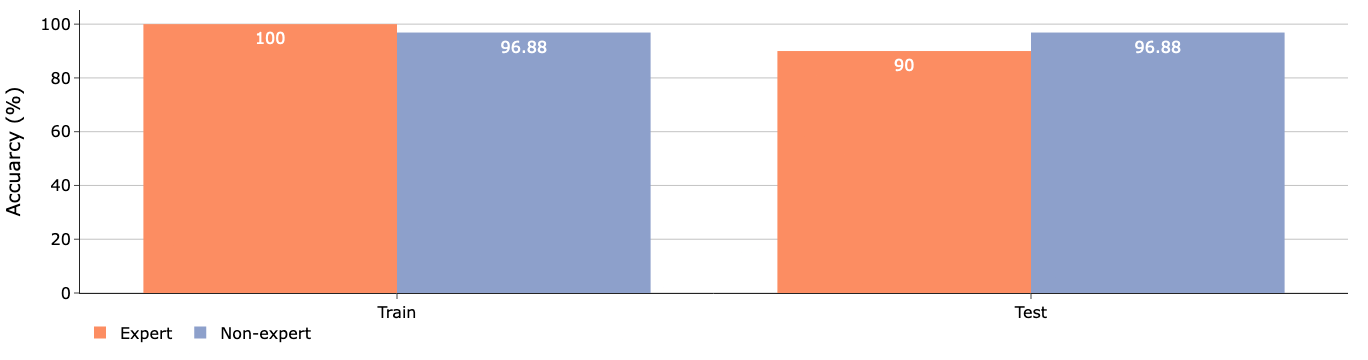

In [63]:
width = 500
animals=['Train', 'Test']
y_expert = [100, 90]
y_nonexpert = [96.88, 96.88]

fig = go.Figure(data=[
    go.Bar(name='Expert', x=animals, y=y_expert, text=y_expert,
           marker_color='#FC8D62'),
    go.Bar(name='Non-expert', x=animals, y=y_nonexpert, text=y_nonexpert,
           marker_color='#8DA0CB')
])
fig.update_traces(textposition='inside',
                #   texttemplate='%{text:.2s}',
                  textfont_size=16,
                  textangle=0,
                  marker_line_width = 0,
                  textfont_color='white',
                  )
fig.update_xaxes(showgrid=False)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#C3C3C3',
                 showgrid=True, gridcolor='#C3C3C3')

fig.update_layout(yaxis_title="Accuarcy (%)",
                #   xaxis_title="Y Axis Title",
                  barmode='group',
                  template='simple_white',
                  #plot_bgcolor='rgba(0, 0, 0, 0)',
                  #paper_bgcolor='rgba(0, 0, 0, 0)',
                  width=int(width),
                  # yaxis_tickformat = '%',
                  font=dict(
                    # family="Courier New, monospace",
                    size=16,
                    color="black"
                    ),
                  legend=dict(
                      orientation="h",
                      yanchor="bottom",
                      y=-0.2,
                      xanchor="left",
                      #x=1
                  ),
                  margin=dict(l=20, r=20, t=10, b=10)
                 )


fig.write_image(os.path.join(path_study_data_results,
                             'accuracy.pdf'))
fig.show(config= {'displaylogo': False})

## 3.2. Response Time

In [64]:
df_time = pd.read_csv(
    path_study_data, encoding='utf-16',
    usecols=['TIME009','TIME010','TIME011','TIME012','TIME013','TIME014',
             'TIME015','TIME016', 'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04',
             'SD18_05'])
# Drop the first row
df_time = df_time.drop(index=[0])
# Reset the index if needed (optional)
df_time.reset_index(drop=True, inplace=True)
df_time[['SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05']] = df_time[[
    'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05']].astype(float)
df_time['SGL_Score'] = df_time[[
    'SD18_01', 'SD18_02', 'SD18_03', 'SD18_04', 'SD18_05']].sum(axis=1)
df_time["Experience"] = df_time["SGL_Score"]>28

### Train and Test Data

In [65]:
df_train_sgl = df_time.melt(
    id_vars=['Experience'],
    value_vars=['TIME009', 'TIME011', 'TIME013', 'TIME015'],
    var_name='Original_Column',
    value_name='Time')
df_train_sgl["Question"] = "Train"
df_train_sgl["Time"] = df_train_sgl[["Time"]].astype(float)

df_test_sgl = df_time.melt(
    id_vars=['Experience'],
    value_vars=['TIME010', 'TIME012', 'TIME014', 'TIME016'],
    var_name='Original_Column',
    value_name='Time')
df_test_sgl["Question"] = "Test"
df_test_sgl["Time"] = df_test_sgl[["Time"]].astype(float)

In [66]:
df_sgl = pd.concat([df_train_sgl, df_test_sgl])
df_novive = df_sgl[df_sgl["Experience"]== False]
df_experienced = df_sgl[df_sgl["Experience"]== True]

### Results

In [67]:
df_novive_train = df_novive[df_novive["Question"]=="Train"]
df_experienced_train = df_experienced[df_experienced["Question"]=="Train"]
# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(df_experienced_train["Time"],
                                       df_novive_train["Time"])

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -0.3452109757437086
P-value: 0.7308197269982053


In [68]:
df_experienced_test = df_experienced[df_experienced["Question"]=="Test"]
df_novive_test = df_novive[df_novive["Question"]=="Test"]
# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(df_experienced_test["Time"],
                                       df_novive_test["Time"])

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.8342281258794537
P-value: 0.4065761566072903


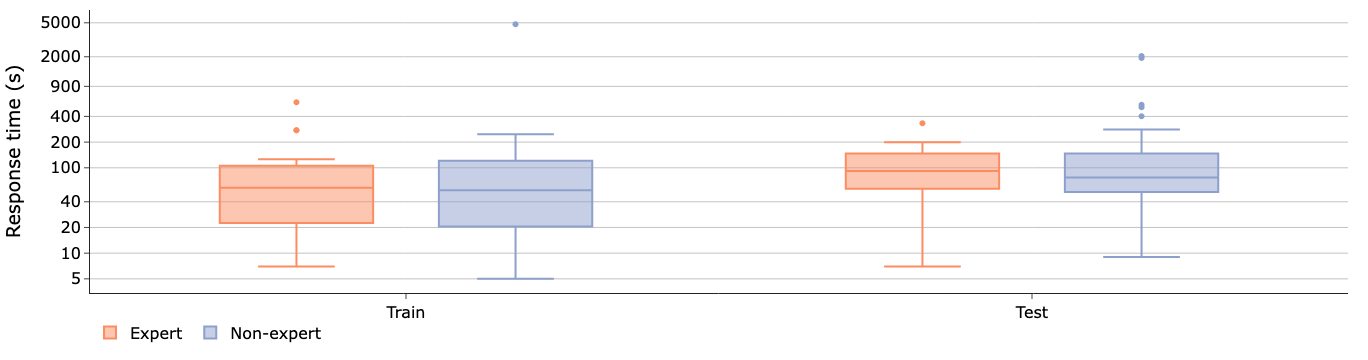

In [69]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_experienced["Time"],
    x=df_experienced["Question"],
    name='Expert',
    marker_color='#FC8D62',
    # boxmean=True
))
fig.add_trace(go.Box(
    y=df_novive["Time"],
    x=df_novive["Question"],
    name='Non-expert',
    marker_color='#8DA0CB',
    # boxmean=True
))

fig.update_xaxes(showgrid=False,zeroline=True,)
fig.update_yaxes(type="log",
                 zeroline=True, zerolinewidth=1, zerolinecolor='#C3C3C3',
                 showgrid=True, gridcolor='#C3C3C3',
                 )
fig.update_layout(
    template='simple_white',
    #plot_bgcolor='rgba(0, 0, 0, 0)',
    #paper_bgcolor='rgba(0, 0, 0, 0)',
    width=500,  # Adjust width in pixels
    yaxis = dict(
        title='Response time (s)',
        tickvals = [0, 5, 10, 20, 40, 100, 200, 400, 900, 2000, 5000],
    ),
    font=dict(
        # family="Courier New, monospace",
        size=16,
        color="black"
        ),
    boxmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="left",
        #x=1
    ),
    margin=dict(l=20, r=20, t=10, b=10),
)

fig.update_layout()

fig.write_image(os.path.join(path_study_data_results,
                             'time_box.pdf'))
fig.show(config= {'displaylogo': False})